In [182]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [196]:
# Section
a = -1
b = 2

# Additional data
epsilon = 1e-6
populationSize = 100

# Iterations 
t_max_i = 20
t_max = 100

# Propabilities
probCrossover = 0.6
probMutation = 0.02

c = 5

In [197]:
def f(x):
    return x * math.sin(10 * math.pi * x) + 1

In [198]:
def getBitArraySize(n):
    bitArraySize = 0
    
    while n > 0:
        n >>= 1
        bitArraySize += 1
        
    return bitArraySize

In [205]:
def standartDeviation(value):
    n = len(value)
    average = 1.0 * sum(value) / n

    result = 0
    for i in range(n):
        result += (value[i] - average) ** 2
        
    result = math.sqrt(result / n)
    
    return result

def sigmaScaling(fitnessPopulation, fitnessIndividual):
    n = len(fitnessPopulation)
    
    f_average = sum(fitnessPopulation) / n
    sigma = standartDeviation(fitnessPopulation)
    
    scaled_f = fitnessIndividual + (f_average - c * sigma)
            
    return scaled_f

In [206]:
def bitToFloat(bitArray):
    return a + ((b - a)) / (2**bitArraySize - 1) * int(bitArray, 2)

def fitness(individual):
    return f(bitToFloat(individual))

def populationFitness(population):
    x = []
    fitnesses = []
    
    for individual in population:
        individualFitness = fitness(individual)
        x.append(individual)
        fitnesses.append(individualFitness)
        
    return (x, fitnesses)

In [207]:
def tournamentMethod(population):
    result = random.sample(population, 2)

    firstFitnessFunction = sigmaScaling(populationFitness(population)[1], fitness(result[0]))
    secondFitnessFunction = sigmaScaling(populationFitness(population)[1], fitness(result[1]))

    if firstFitnessFunction < secondFitnessFunction:
        best = result[0]
    else:
        best = result[1]  

    return best

def mutation(individual):
    randomProbability = np.random.random_sample()

    if randomProbability <= probMutation:
        charIndexToMutate = np.random.randint(low = 0, high = bitArraySize)
        charToMutate = individual[charIndexToMutate] 

        if charToMutate == '0':
            individual = individual[:charIndexToMutate] + "1" + individual[charIndexToMutate + 1:]
        else:
            individual = individual[:charIndexToMutate] + "0" + individual[charIndexToMutate + 1:]

    return individual

def crossover(population, propability):    
    individualOne = population[np.random.randint(low = 0, high = populationSize - 1)]
    individualTwo = population[np.random.randint(low = 0, high = populationSize - 1)]

    probabilityForCrossover = np.random.random_sample()
    if probabilityForCrossover <= propability:
        randomIndex = np.random.randint(low = 0, high = bitArraySize)

        firstHalf_IndividualOne = individualOne[:randomIndex]
        secondHalf_IndividualOne = individualOne[randomIndex:]

        firstHalf_IndividualTwo = individualTwo[:randomIndex]
        secondHalf_IndividualTwo = individualTwo[randomIndex:]

        crossovered = firstHalf_IndividualOne + secondHalf_IndividualTwo
        crossovered = firstHalf_IndividualTwo + secondHalf_IndividualOne
    else:
        crossovered = individualOne
        crossovered = individualTwo
            
    return crossovered

In [208]:
def applyTournamentForPopulation(population):
    newPopulation = []
    
    while len(newPopulation) < populationSize:
        best = tournamentMethod(population) 
        newPopulation.append(best)
    
    return newPopulation

def mutatePopulation(population):
    newPopulation = []
    
    for individual in population:
        mutatedIndividual = mutation(individual)
        newPopulation.append(mutatedIndividual)

    return newPopulation
        
def crossoverPopulation(population, propability):    
    newPopulation = []
    
    while len(newPopulation) < populationSize:
        crossoveredIndividuals = crossover(population, propability)
        newPopulation.append(crossoveredIndividuals)
            
    return newPopulation

x    =  1.947205530930884
f(x) =  -0.9397065680103076


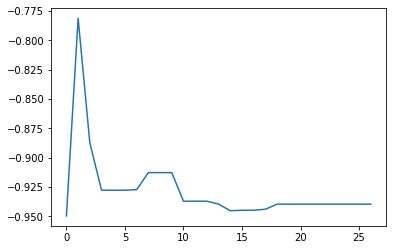

In [209]:
initialPopulation = []
population = []

n = (int)((b - a) / epsilon)
bitArraySize = getBitArraySize(n)

for i in range(populationSize):
    initialPopulation += [np.random.randint(2, size = (bitArraySize,))]
    
for i in range(populationSize):
    population.append("".join(str(x) for x in initialPopulation[i]))

q = []
e = []

best = []
bestX = []

i = 0
max_i = 0

while i <= t_max:
    population = applyTournamentForPopulation(population)
    population = mutatePopulation(population)
    population = crossoverPopulation(population, probCrossover)

    bestX, fitnesses = populationFitness(population)
    best.append(min(fitnesses))

    if i > 1:
        if best[i] - best[i - 1] < epsilon:
            max_i += 1

    if max_i > t_max_i:
        break

    q.append(i)
    e.append(best[i])

    i += 1    

print('x    = ', bitToFloat(bestX[i - 1]))
print('f(x) = ', best[i - 1])

plt.plot(q, e)